编码步骤
1. 导入MNIST数据集。
2. 分析MNIST样本特点定义变量。
3. 构建模型。
4. 训练模型并输出中间状态参数。
5. 测试模型。
6. 保存模型。
7. 读取模型。

# 导入数据集
利用TensorFlow代码下载MNIST

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


> 代码中的one_hot=True，表示将样本标签转化为one_hot编码。

- MNIST数据集汇总图片是28x28像素，所以，每一幅就是1行784列的数据，括号中的每一个值代表一个像素。
- 如果图片是黑白的，图片中黑色的地方数值为0，有图案的地方，数值为0~255之间的数字，代表其**颜色的深度**。
- 如果是彩色的图片，一个像素会由3个值来表示RGB。

In [11]:
print('输入数据：',mnist.train.images)
print('输入数据的shape:',mnist.train.images.shape)

输入数据： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据的shape: (55000, 784)


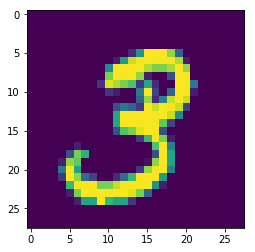

In [17]:
 # 显示第一张图片
import pylab
im = mnist.train.images[1]
im = im.reshape(28,28)
pylab.imshow(im)
pylab.show()

In [19]:
# MNIST里面包含3个数据集：第一个是训练数据集，另外两个是测试数据集和验证数据集。
print('输入数据集的shape：',mnist.test.images.shape)
print('验证数据集的shape：',mnist.test.images.shape)

输入数据集的shape： (10000, 784)
验证数据集的shape： (10000, 784)


# 分析图片特点
由于输入图片是550000x784的矩阵，所以先创建一个[None,784]的占位x和一个[None,10]的占位符y,然后使用feed机制将图片和标签输入进去。

In [21]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)
import pylab

# 重置图
tf.reset_default_graph()

# 定义占位符
x = tf.placeholder(tf.float32,[None,784]) # 数据集的维度是28x28=784
y = tf.placeholder(tf.float32,[None,10]) # 数字0~9，共有10个类别

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


> 代码中的None,表示张量的第一个维度可以是任何长度的。x代表能够输入任何数量的MNIST图像，每一张图展平成784的向量。

# 构建模型
## 定义学习参数
模型也需要权重值和偏执量，它们被统一叫做学习参数。在TensorFlow里，使用Variable来定义学习参数。

一个Variable代表一个可修改的张量，定义在TensorFlow的图中，其本身也是一种变量。使用Variable定义的学习参数可以用于计算输入值，也可以在计算中被修改。

In [22]:
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.zeros([10]))

> W的维度是[784,10],因为想要用784维的图片向量乘以它，以得到一个10维的证据值向量，每一位对应不同数字类。b的形状是[10],所以可以直接把它加到输出上面。

## 定义输出节点

In [24]:
pred = tf.nn.softmax(tf.matmul(x,W)+b) #SoftMax分类 

用tf.matmul(x,W)表示x乘以W，这里x是一个二维张量，拥有多个输入。然后再加上b,把他们的和输入到tf.nn.softmax函数里。

## 定义反向传播的结构

In [26]:
# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

# 定义参数
learning_rate = 0.01

# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

1. 将生成的pred与样本标签y进行一次交叉熵的运算，然后取平均值。
2. 将这个结果作为一次正向传播的误差，通过梯度下降的优化方法找到能够使这个误差最小化的b和W的偏移量。
3. 更新b和W，使其调整为合适的参数。

整个过程就是不断地让损失值变小。因为损失值越小，才能表明输出的结果跟标签数据越相近。当cost小到我们的需求时，这时的b和W就是训练出来的合适值。